In [5]:
import pandas as pd
import boto3
from io import StringIO

bucket_name = 'watchesdata'
file_key = 'watches/watches_final.csv'

s3 = boto3.client('s3')

In [7]:
response = s3.get_object(Bucket=bucket_name, Key=file_key)

csv_data = response['Body'].read().decode('utf-8') 
data = pd.read_csv(StringIO(csv_data))

data.head()

,name,price,Brand,Collection,Series,Model No,Features,Movement,Calibre,Case Size,...,Lug Width,Limited Edition,Diameter,Date,Chronograph,Base,Frequency (bph),Power Reserve (hours),jewels,Dial Type
0,Laureato 38 mm,1580000,Girard-Perregaux,Laureato,Classic Laureato,81005-11-3154-1CM,Date,Automatic,GP03300,38.0,...,NaN,0,NaN,NaN,NaN,NaN,28800.0,0.46,NaN,NaN
1,Laureato 38 mm,2000000,Girard-Perregaux,Laureato,Classic Laureato,81005-11S3320-1CM,Date,Automatic,GP03300,38.0,...,NaN,0,NaN,NaN,NaN,NaN,28800.0,0.46,NaN,NaN
2,Defy Skyline,890000,Zenith,Defy,Skyline,03.9300.3620/51.I001,"Date, Small Seconds",Automatic,El Primero 3620,41.0,...,NaN,0,NaN,NaN,NaN,NaN,36000.0,0.60,NaN,NaN
3,Defy Skyline 36,1190000,Zenith,Defy,Skyline,16.9400.670/51.I001,Date,Automatic,Elite 670,36.0,...,NaN,0,NaN,NaN,NaN,NaN,28800.0,0.50,NaN,NaN
4,Constellation Quartz 36 mm,623800,Omega,Constellation,Constellation,131.20.36.60.02.001,Date,Quartz,NaN,36.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5749 entries, 0 to 5748
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5749 non-null   object 
 1   price                  5749 non-null   int64  
 2   Brand                  5749 non-null   object 
 3   Collection             5749 non-null   object 
 4   Series                 2961 non-null   object 
 5   Model No               5749 non-null   object 
 6   Features               4737 non-null   object 
 7   Movement               5742 non-null   object 
 8   Calibre                4303 non-null   object 
 9   Case Size              5749 non-null   float64
 10  Case Thickness         4230 non-null   float64
 11  Case Shape             5749 non-null   object 
 12  Case Material          5747 non-null   object 
 13  Case Back              2376 non-null   object 
 14  Glass Material         5741 non-null   object 
 15  Lumi

In [39]:
data.to_csv("data/raw_csw.csv")

In [76]:
df = pd.read_csv("data/raw_csw.csv")

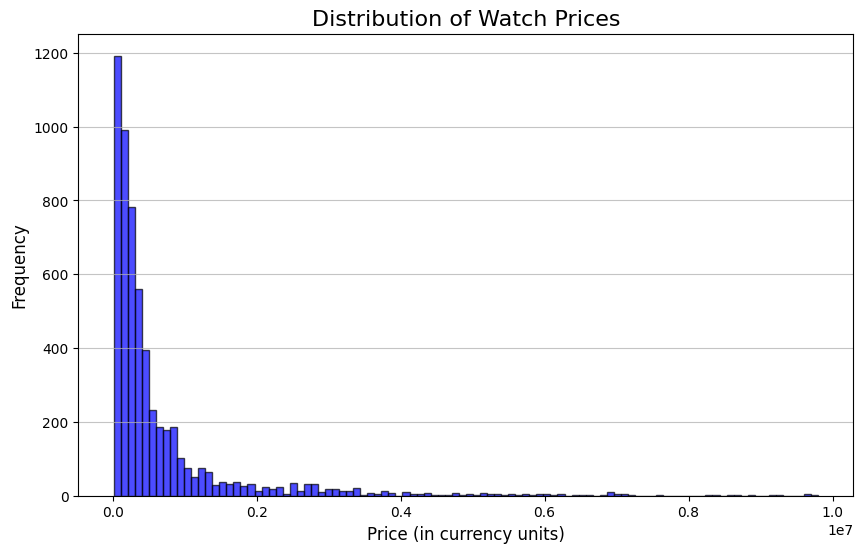

In [57]:
import matplotlib.pyplot as plt
import numpy as np

df = df[df['price'] < 10000000]

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Watch Prices', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [72]:
brand_counts = df['Brand'].value_counts()
popular_brands = brand_counts[brand_counts > 25].index
filtered_df = df[df['Brand'].isin(popular_brands)]
median_prices = filtered_df.groupby('Brand')['price'].median().sort_values(ascending=False)
median_prices

Brand
Parmigiani             3400000.0
Bovet                  3370000.0
H. Moser & Cie.        2800000.0
Jacob & Co.            2700000.0
Gerald Charles         2680000.0
Arnold & Son           2500000.0
Louis Moinet           2370000.0
Girard-Perregaux       2040000.0
CVSTOS                 1590000.0
Ulysse Nardin          1480000.0
Jaeger-LeCoultre       1380000.0
Hublot                 1145000.0
Zenith                 1090000.0
BVLGARI                 994500.0
Panerai                 877200.0
IWC                     810000.0
Edouard Koehn           800000.0
Carl F. Bucherer        788508.0
Omega                   785350.0
Corum                   677000.0
Grand Seiko             590000.0
Breitling               572000.0
Bell & Ross             500000.0
Perrelet                460000.0
NORQAIN                 391550.0
Louis Erard             389000.0
Tudor                   387500.0
Eberhard & Co.          373000.0
Bremont                 360000.0
TAG Heuer               357000.0
Baum

In [77]:
df[df['Brand'] == "Casio"]

,Unnamed: 0,name,price,Brand,Collection,Series,Model No,Features,Movement,Calibre,...,Lug Width,Limited Edition,Diameter,Date,Chronograph,Base,Frequency (bph),Power Reserve (hours),jewels,Dial Type
